C:\Users\Usuario\AppData\Local\Temp\ipykernel_9556\3818387972.py:44: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, rv.pdf(pos), colors=f'C{i}', levels=5, linewidths=2, label=f'Component {i+1}')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


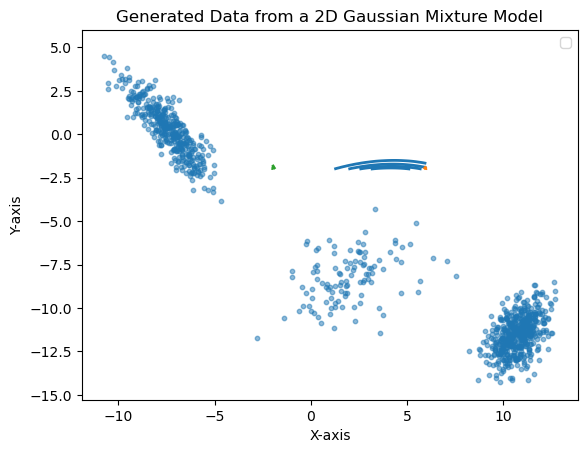

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the parameters of the Gaussian Mixture Model
weights = np.array([1/8 , 1/2, 3/8])  # Weight for each component

means = np.array([[1.7, -8.4], [10.7, -11.5], [-7.4, 0.3]])  # Mean vectors for each component

covariances = np.array([[[3, 0.8], 
                         [0.8, 2.1]],
                        [[0.6, 0.3], 
                         [0.3, 1.1]],
                        [[1.3, -1.5],
                         [-1.5, 2.3]]])  # Covariance matrices for each component

# Number of components
num_components = len(weights)

# Generate some data points from the GMM
num_samples = 1000
data = np.zeros((num_samples, 2))

for i in range(num_samples):
    # Select a component based on the weights
    component = np.random.choice(num_components, p=weights)
    
    # Generate a sample from the selected component
    sample = np.random.multivariate_normal(means[component], covariances[component])
    
    data[i] = sample

# Plot the generated data
plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.5)
plt.title('Generated Data from a 2D Gaussian Mixture Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot the contour plots for each component's distribution
for i in range(num_components):
    x, y = np.meshgrid(np.linspace(-2, 6, 100), np.linspace(-2, 6, 100))
    pos = np.dstack((x, y))
    rv = multivariate_normal(means[i], covariances[i])
    plt.contour(x, y, rv.pdf(pos), colors=f'C{i}', levels=5, linewidths=2, label=f'Component {i+1}')

plt.legend()
plt.show()